# Week 5 - pandas

`pandas` is an open source library that brings high-performance, easy-to-use data structures and analysis tools to the Python programming language. It's core features are its 1-dimensional `Series` and 2-dimensional `DataFrame` objects. The former is like a NumPy array (`pandas` is built on top of NumPy) with an explicit index, and the latter is a bit like an Excel worksheet. 

The [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) and [getting started](https://pandas.pydata.org/docs/getting_started/index.html) guides are excellent places to learn more, but read on for my own tour of the library which draws comparisons between pandas and familiar spreadsheet programs (e.g., [Microsoft Excel](https://support.microsoft.com/en-us/excel), [Apple Numbers](https://www.apple.com/uk/numbers/), [LibreOffice Calc](https://www.libreoffice.org/discover/calc/), [Google Sheets](https://www.google.co.uk/sheets/about/)).

## Importing `pandas`

The community agreed custom for importing `pandas` is:

```Python
import pandas as pd
```

This gives us access to all `pandas` functionality, which means it is a bit like clicking on the desktop icon that launches a spreadsheet application. Let's import `pandas`, and while we are at it, let's also import `numpy` and `matplotlib` (and set some configuration options).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

We'll begin with a detailed look at the `Series` and `DataFrame` objects. 


## `Series`

`pd.Series` is much like a 1-dimensional NumPy array, but with explicit axis labels, the ability to hold any data type, and various feature and method enhancements to simplify working with complex data. We can think of a `Series` as the rough equivalent of a column in a spreadsheet application. 

The basic way of making a `Series` is as follows:

```Python
s = pd.Series(data, index=index)
```

Note that the argument for `data` can take various forms, such as a Python dictionary, a `numpy` array, a list, or even a single value. If provided, `index` must be a list of axis labels with the same length as `data`. 

Here's a simple `Series` of random numbers.

In [2]:
s = pd.Series(np.random.random(100))
print(s)

0     0.965606
1     0.500888
2     0.485584
3     0.704136
4     0.001702
        ...   
95    0.199428
96    0.274759
97    0.653682
98    0.639472
99    0.949416
Length: 100, dtype: float64


We didn't specify an `index`, so a default integer-based index (starting at 0) was applied, which we can see to the left of the actual values. Below the index and values we can also see the length and data type. 

Now, let's make a `Series` containing the letters of the alphabet and assign also an `index` and a `name`. 

In [3]:
letters = list('abcdefghijklmnopqrstuvwxyz')
s = pd.Series(letters, index=range(1, 27), name='lowercase')
print(s)

1     a
2     b
3     c
4     d
5     e
6     f
7     g
8     h
9     i
10    j
11    k
12    l
13    m
14    n
15    o
16    p
17    q
18    r
19    s
20    t
21    u
22    v
23    w
24    x
25    y
26    z
Name: lowercase, dtype: object


A few things to note here. First, the `index` doesn't default to zero because we specified our own labels. Second, the `name` we provided is shown below the values (this is analogous to a column header in spreadsheet applications). Third, the data type is `object`, denoting that the `Series` contains `str` data. 

## `DataFrame`

A `DataFrame` is a 2-dimensional data structure consisting of rows and columns, which makes it similar to a worksheet in Microsfot Excel. Each column in a `DataFrame` is a `Series`, which by now we know to be a feature-enhanced, explicitly indexed, NumPy array that can contain any type of data. A `DataFrame`, then, is a collection of `Series` that share a common `Index`.

An easy way to create a basic `DataFrame`is to pass a Python `dict` to the `pd.DataFrame(...)` constructor. In this scenario, the keys will serve as names for the columns, and the values, which must be convertible to a series-like data structure, will be the data. 

In [4]:
# It's the familiar shopping example again...
df = pd.DataFrame(
    {
        'item': ['apples', 'bananas', 'bread', 'yoghurt', 'pasta', 'coffee', 'butter', 'carrots'],
        'unit_price': np.array([2.20, 1.85, 1.10, 1.20, 1.45, 2.80, 2.40, .89], dtype='float32'),
        'quantity': np.array([2, 1, 2, 4, 2, 1, 1, 1]),
        'date_of_purchase': pd.Timestamp('20221208'),
        'shop': pd.Categorical(['Aldi'] * 8),
        'paid_cash': True
    }
)
df

,item,unit_price,quantity,date_of_purchase,shop,paid_cash
0,apples,2.20,2,2022-12-08,Aldi,True
1,bananas,1.85,1,2022-12-08,Aldi,True
2,bread,1.10,2,2022-12-08,Aldi,True
3,yoghurt,1.20,4,2022-12-08,Aldi,True
4,pasta,1.45,2,2022-12-08,Aldi,True
5,coffee,2.80,1,2022-12-08,Aldi,True
6,butter,2.40,1,2022-12-08,Aldi,True
7,carrots,0.89,1,2022-12-08,Aldi,True


As with NumPy arrays, the `DataFrame` object stores some basic information as attributes. Below, we get information about shape, number of dimensions, size (number of elements), and the data types for each column of `df`.

In [5]:
print('Shape:                ', df.shape)
print('Number of dimensions: ', df.ndim)
print('Number of elements:   ', df.size)
print('Data types:\n')
print(df.dtypes)

Shape:                 (8, 6)
Number of dimensions:  2
Number of elements:    48
Data types:

item                        object
unit_price                 float32
quantity                     int64
date_of_purchase    datetime64[ns]
shop                      category
paid_cash                     bool
dtype: object


We can also see how much memory (in bytes) is being used by each column.

In [6]:
df.memory_usage() 

Index               128
item                 64
unit_price           32
quantity             64
date_of_purchase     64
shop                124
paid_cash             8
dtype: int64

The actual values stored in a `DataFrame` are accessible via the `.values` attribute. Inspection of these values shows that `pandas` is built right on top of NumPy.

In [7]:
print("The values of the data frame are: ")
print(df.values)
print("The type of the values is ", type(df.values))

The values of the data frame are: 
[['apples' 2.200000047683716 2 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['bananas' 1.850000023841858 1 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['bread' 1.100000023841858 2 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['yoghurt' 1.2000000476837158 4 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['pasta' 1.4500000476837158 2 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['coffee' 2.799999952316284 1 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['butter' 2.4000000953674316 1 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]
 ['carrots' 0.8899999856948853 1 Timestamp('2022-12-08 00:00:00') 'Aldi'
  True]]
The type of the values is  <class 'numpy.ndarray'>


## Viewing, selecting and indexing

If you are new to `pandas`, it may sometimes feel like the data are hidden away and out of reach, especially in comparison to spreadsheet environments where data are generally always on the screen and can be selected and browsed by clicking and scrolling the mouse. Thankfully, `pandas` has some handy tools for viewing a `DataFrame`. 

`DataFrame.head()` can be used to view the top of a frame, and `DataFrame.tail()` to view the bottom. The default number of rows to display is `5`, but we can change this by specifying a number. 

In [8]:
# Show the first three rows of df
df.head(3)

,item,unit_price,quantity,date_of_purchase,shop,paid_cash
0,apples,2.20,2,2022-12-08,Aldi,True
1,bananas,1.85,1,2022-12-08,Aldi,True
2,bread,1.10,2,2022-12-08,Aldi,True


In [9]:
# Show the last three rows of df
df.tail(3)

,item,unit_price,quantity,date_of_purchase,shop,paid_cash
5,coffee,2.80,1,2022-12-08,Aldi,True
6,butter,2.40,1,2022-12-08,Aldi,True
7,carrots,0.89,1,2022-12-08,Aldi,True


The row and column indices themselves can also be accessed and operated upon (note that we didn't specify a row index at the time of creation, so we got a default `RangeIndex`).

In [10]:
# View the row index of df
df.index

RangeIndex(start=0, stop=8, step=1)

In [11]:
# View the column index of df
df.columns

Index(['item', 'unit_price', 'quantity', 'date_of_purchase', 'shop',
       'paid_cash'],
      dtype='object')

Let's talk about selecting columns. To select a single column of a `DataFrame`, put its name in square brackets. This is a bit like clicking on the column header in a spreadsheet to highlight the entire column. The result of this operation is a `Series`.

In [12]:
df['item']

0     apples
1    bananas
2      bread
3    yoghurt
4      pasta
5     coffee
6     butter
7    carrots
Name: item, dtype: object

As long as the column name doesn't contain whitespace or special characters, single columns may also be accessed in equivalent fashion via `.` notation. I often find this more convenient, as it's easier to type.

In [13]:
df.unit_price

0    2.20
1    1.85
2    1.10
3    1.20
4    1.45
5    2.80
6    2.40
7    0.89
Name: unit_price, dtype: float32

Selecting multiple columns at the same time requires a list of column names, and returns a `DataFrame` (this is like doing `Ctrl+click` or `Ctrl+drag` to select multiple columns in a spreadsheet).

In [14]:
df[['item', 'quantity', 'unit_price']]

,item,quantity,unit_price
0,apples,2,2.20
1,bananas,1,1.85
2,bread,2,1.10
3,yoghurt,4,1.20
4,pasta,2,1.45
5,coffee,1,2.80
6,butter,1,2.40
7,carrots,1,0.89


`[]` can be used to slice by row

In [15]:
df[2:5]

,item,unit_price,quantity,date_of_purchase,shop,paid_cash
2,bread,1.10,2,2022-12-08,Aldi,True
3,yoghurt,1.20,4,2022-12-08,Aldi,True
4,pasta,1.45,2,2022-12-08,Aldi,True


`pandas` also supports [**label-based indexing**](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label), which is extremely useful for selecting individual values or cross-sections of a `DataFrame`. 

Label-based indexing is performed using the `.loc[]` and `.at[]` access methods. Note these are square, and not round, brackets. 


In [16]:
# Select rows 4:7 and the specified columns
df.loc[4:7, ['item', 'unit_price', 'quantity']]

,item,unit_price,quantity
4,pasta,1.45,2
5,coffee,2.80,1
6,butter,2.40,1
7,carrots,0.89,1


In [17]:
# Select the value in row=3, column='item'
df.at[3, 'item']

'yoghurt'

[**Positional indexing**](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer) can be achieved with the `.iloc[]` and `.iat[]` access methods. The difference here is that we ***must*** provide integers (starting at `0`). The behavior is very similar to array slicing in Python and NumPy. 

In [18]:
# Select the 6th row
df.iloc[5]

item                             coffee
unit_price                          2.8
quantity                              1
date_of_purchase    2022-12-08 00:00:00
shop                               Aldi
paid_cash                          True
Name: 5, dtype: object

In [19]:
# Select the value in the second row of the first column
df.iat[1, 0]

'bananas'

[Boolean indexing](https://pandas.pydata.org/docs/user_guide/10min.html#boolean-indexing) is another common way to select a subset of data from a frame. Suppose we cared only about rows where the `unit_price` was over `£2.00`. 

In [20]:
df[df['unit_price'] > 2.]

,item,unit_price,quantity,date_of_purchase,shop,paid_cash
0,apples,2.2,2,2022-12-08,Aldi,True
5,coffee,2.8,1,2022-12-08,Aldi,True
6,butter,2.4,1,2022-12-08,Aldi,True


This works, because the expression inside the square brackets evaluates as a `Series` of `bool`, and the indexing operation ensures that we only get the rows where the expression comes up `True`. 

In [21]:
df['unit_price']>2.

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7    False
Name: unit_price, dtype: bool

We can get quite fancy by chaining multiple expressions together. For example, if we only wanted rows where the `unit_price` is greater than `£1.00` and less than `£2.00`.

In [22]:
df[((df['unit_price'] > 1.) & (df['unit_price'] < 2.))]

,item,unit_price,quantity,date_of_purchase,shop,paid_cash
1,bananas,1.85,1,2022-12-08,Aldi,True
2,bread,1.10,2,2022-12-08,Aldi,True
3,yoghurt,1.20,4,2022-12-08,Aldi,True
4,pasta,1.45,2,2022-12-08,Aldi,True


## World population dataset

The best way to learn `pandas` is to use it with real data, so let's explore some more advanced features with an actual dataset. 

In the `data` folder of the course materials, there's a file called `world_population.csv` which I sourced from an excellent data science website called [Kaggle](https://www.kaggle.com/). The file contains historical population data for every country/territory in the world, along with various other parameters. Here's what's in the file:

| Variable                    | Definition                                               |
|:----------------------------|:---------------------------------------------------------|
| Rank                        | Rank by Population                                       |
| CCA3                        | 3 Digit Country/Territories Code                         |
| Country                     | Name of the Country/Territories                          |
| Capital                     | Name of the Capital                                      |
| Continent                   | Name of the Continent                                    |
| 2022 Population             | Population of the Country/Territories in the year 2022   |
| 2020 Population             | Population of the Country/Territories in the year 2020   |
| 2015 Population             | Population of the Country/Territories in the year 2015   |
| 2010 Population             | Population of the Country/Territories in the year 2010   |
| 2000 Population             | Population of the Country/Territories in the year 2000   |
| 1990 Population             | Population of the Country/Territories in the year 1990   |
| 1980 Population             | Population of the Country/Territories in the year 1980   |
| 1970 Population             | Population of the Country/Territories in the year 1970   |
| Area (km²)                  | Area size of the Country/Territories in square kilometer |
| Density (per km²)           | Population Density per square kilometer                  |
| Growth Rate                 | Population Growth Rate by Country/Territories            |
| World Population Percentage | The population percentage by each Country/Territories    |

Let's start by loading and inspecting the data. 

Because its a `CSV` file, `pd.read_csv(...)` is right tool for the job.

In [23]:
df = pd.read_csv('../data/world_population.csv')
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


We now have a `DataFrame` with `17` columns and `234` rows, which appear to be sorted by `Country` in ascending alphabetical order. All in all, these are clean and well organized data, but if we sorted the rows by `Rank`, we could get a quick and easy insight into the most and least populous countries. We can do this using `.sort_values(...)`.

In [24]:
# Sort the rows by Rank in descending order
df.sort_values('Rank', ascending=True)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


This is great, but everyone knows that China is the most populated country in the world. Surely there is a more nuanced story to be told. Let's start by calculating the most recent estimate of the global population by summing all of the values in the `2022 Population` column. 

In [25]:
print('The global population in 2022 is: ')
df['2022 Population'].sum()

The global population in 2022 is: 


7973413042

That is believable. But now I'm curious how that is distributed by `Continent`. 

A `.groupby` operation is perfect for this job. 

> `.groupby()` - [Read more here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [26]:
# Group by Continent and sum the values
df.groupby('Continent')['2022 Population'].sum()

Continent
Africa           1426730932
Asia             4721383274
Europe            743147538
North America     600296136
Oceania            45038554
South America     436816608
Name: 2022 Population, dtype: int64

Unsurprisingly, Asia is the most highly populated continent. A bar chart may help us to appreciate this more fully. We can easily make a bar chart using the `.plot()` method for `Series` and `DataFrame`s. 

> `.plot()` - [Read more here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

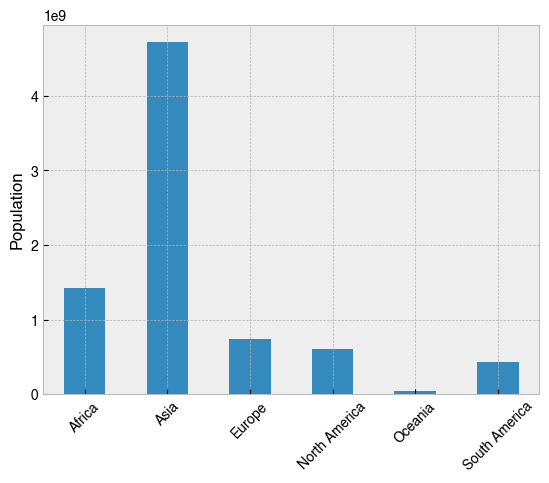

In [27]:
# Repeat the above operation, but this time chain a plotting method to the end
(
 df.groupby('Continent')['2022 Population']
 .sum()
 .plot(kind='bar', rot=45, xlabel='', ylabel='Population')
);

So Asia is the most populated continent, but surely that's just because its the biggest. How does the population relate to the total size of the continent? The `Density (per km²)` column looks like it was calculated by dividing the population of a country by its total area, so repeating the operation with this variable will help to develop the story. 

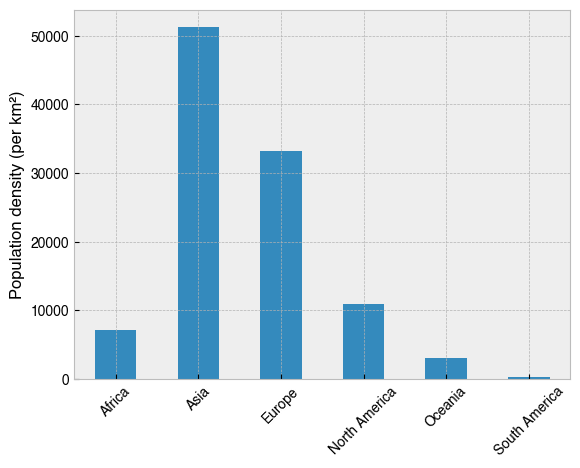

In [28]:
# As above, but with the 'Density (per km²)' column instead
(
 df.groupby('Continent')['Density (per km²)']
 .sum()
 .plot(kind='bar', rot=45, xlabel='', ylabel='Population density (per km²)')
);

This paints a different picture. Most striking is the difference for Europe. Though it is the third most populated continent, Europe comes second for population density, and by a long way in comparison to the others. This is especially true in comparison with South America, whose population is very sparse indeed.

## The complete picture - population growth

To tell the overall story of these population data, I came up with my own two-figure solution, which I feel does a pretty good job. I sort the data by `Rank`, calculate a column-wise differential on the `<date> Population` columns, and then plot the result for each country in a stacked horizontal bar chart, with bars to the left show population decline, and bars to right show population growth for that period. To avoid ambiguity, I put the total population values to the side of each bar. On the right, these values indicate the population for that country in 2022, and on the left, they indicate the total population decline since 1970. 

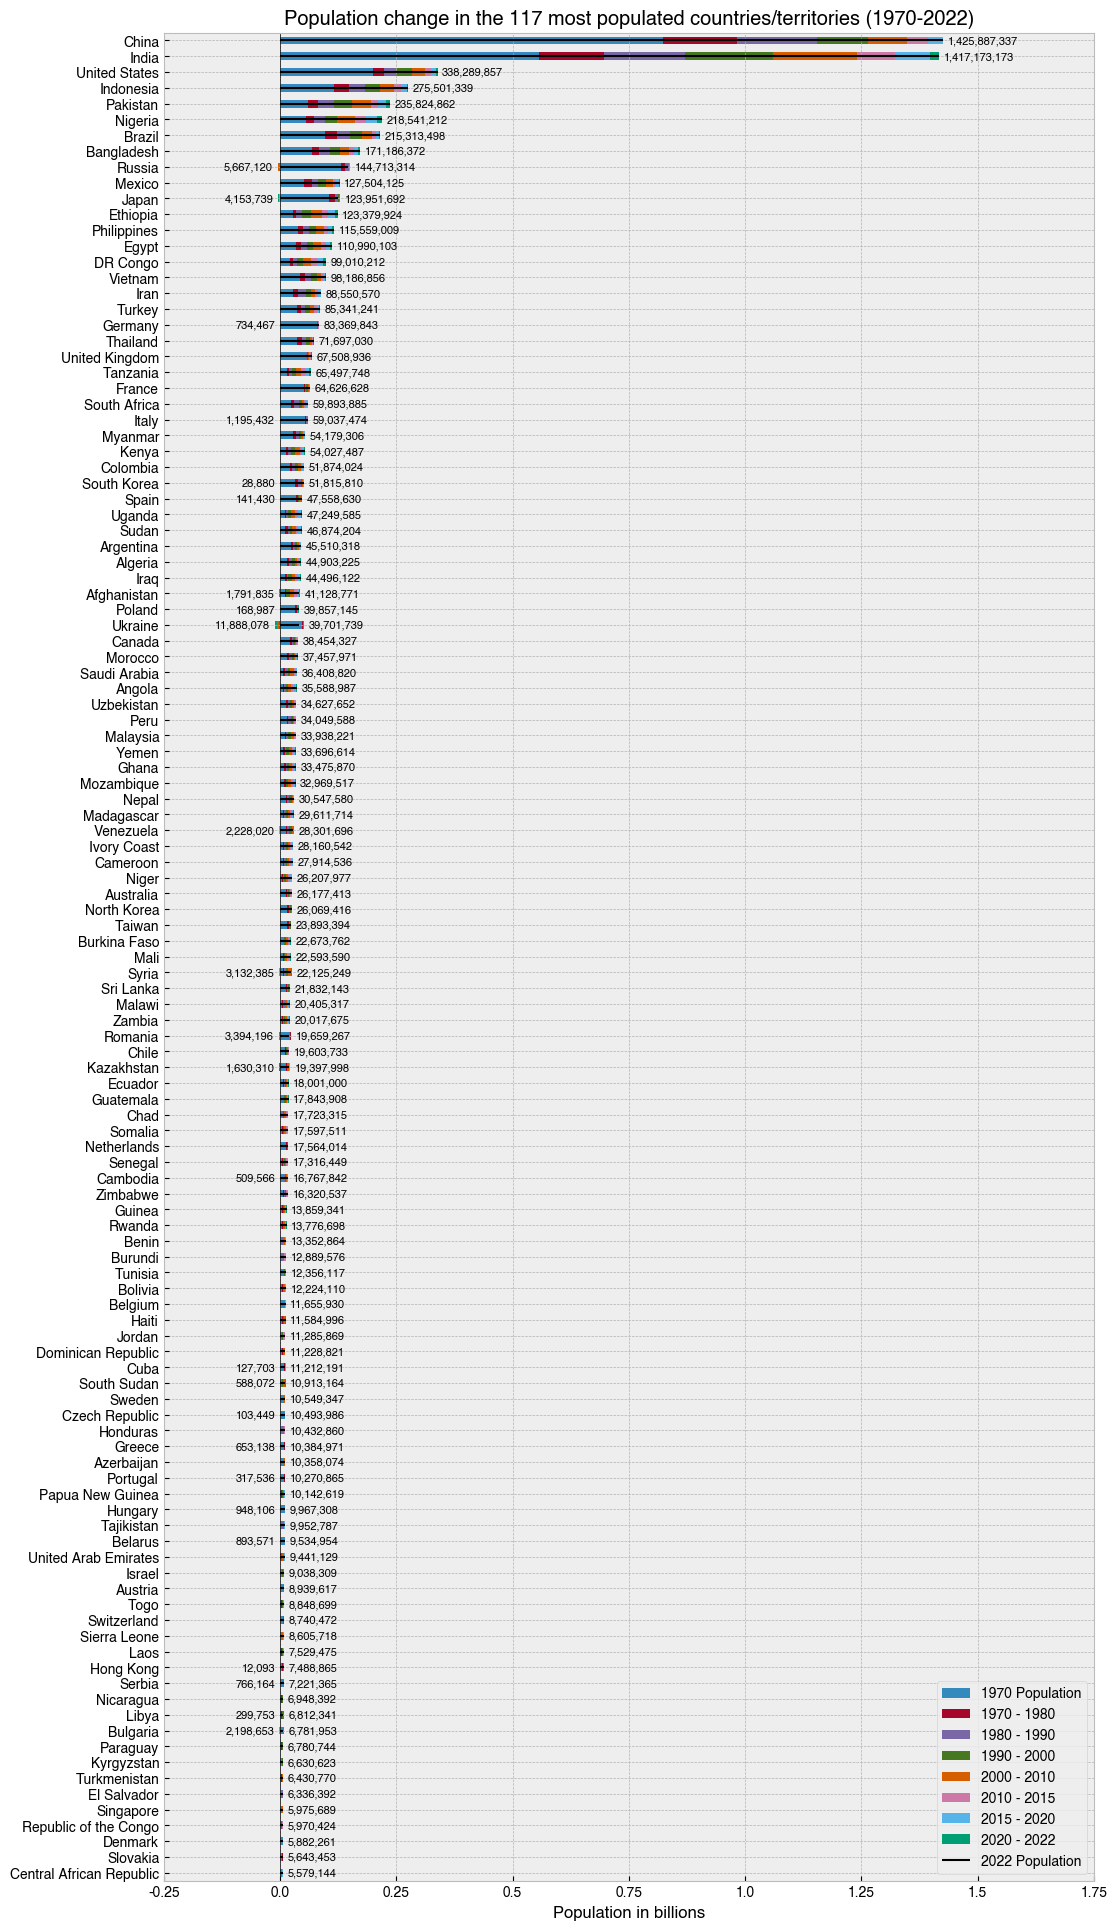

In [29]:
# Get the columns with the population data
pop_cols = df.columns[df.columns.str.endswith('Population')]

# Sort and select data
data = (df
 .set_index('Country')  # Set 'Country' as the index
 .sort_values('Rank', ascending=True)[pop_cols]  # Sort by 'Rank' and keep only the columns with population data
 .iloc[0:117]  # Choose 117 MOST populated countries with location-based indexing
 .loc[:, lambda df_: reversed(df_.columns)]  # Reverse the order of the columns in a fancy way
)

# Pull out the base population at 1970
base_pop_1970 = data['1970 Population']

# Calculate a column-wise differential. This means the data will
# now reflect change from the previous timepoint, rather than the
# total population at that time.
data = data.diff(axis=1)

# Put the base population back in
data['1970 Population'] = base_pop_1970

# Make a figure and axis that's big enough to show the data
fig, ax = plt.subplots(figsize=(12, 24))

# Plot a horizontal bar chart with pandas plotting method.
# Note the reversal of the data with [::-1], which is done
# to make sure the longest bars are at the top
data[::-1].plot(kind='barh', stacked=True, ax=ax)
lines = ax.hlines(range(0,117), 0, data[::-1].sum(axis=1).values, color='k', lw=1.5)

# Add the numbers as text
for i, (country, row) in enumerate(data[::-1].iterrows()):
    pop = row.sum()
    text_pos = row[row>0].sum()
    ax.text(text_pos+1e7, i, '{:,}'.format(pop), va='center', fontsize=8)
    text_pos_neg = row[row < 0].abs().sum()
    if text_pos_neg > 0:
        ax.text(-(text_pos_neg+1e7), i, f'{text_pos_neg:,}', va='center', ha='right', fontsize=8)

# Add a vertical black line at zero as a visual aid
ax.axvline(0, 0, 1, c='k', lw=.5)

# Format the x axis
def billions_formatter(x, pos):
    return f'{x / 1000_000_000}'
ax.xaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# Tweak axis 
ax.set(
    ylabel='',
    title='Population change in the 117 most populated countries/territories (1970-2022)',
    xlabel='Population in billions',
    xlim=(-.25e9, 1.75e9)
);

# Put legend in lower right of figure
handles, labels = ax.get_legend_handles_labels()
handles.append(lines)
labels = [
    '1970 Population',
    '1970 - 1980',
    '1980 - 1990',
    '1990 - 2000',
    '2000 - 2010',
    '2010 - 2015',
    '2015 - 2020',
    '2020 - 2022',
    '2022 Population'
]
ax.legend(handles, labels, loc='lower right')

# Save the figure with a tight bounding box and high resolution (300 dots-per-inch)
fig.savefig('../images/most_populated_countries_2022.png', bbox_inches='tight', dpi=300)

Rinse and repeat for the other half of the data. By using a second figure for the less-populated half of the dataset, we reset the scale on the x-axis and dramatically improve the explanatory power of the visualisations. 

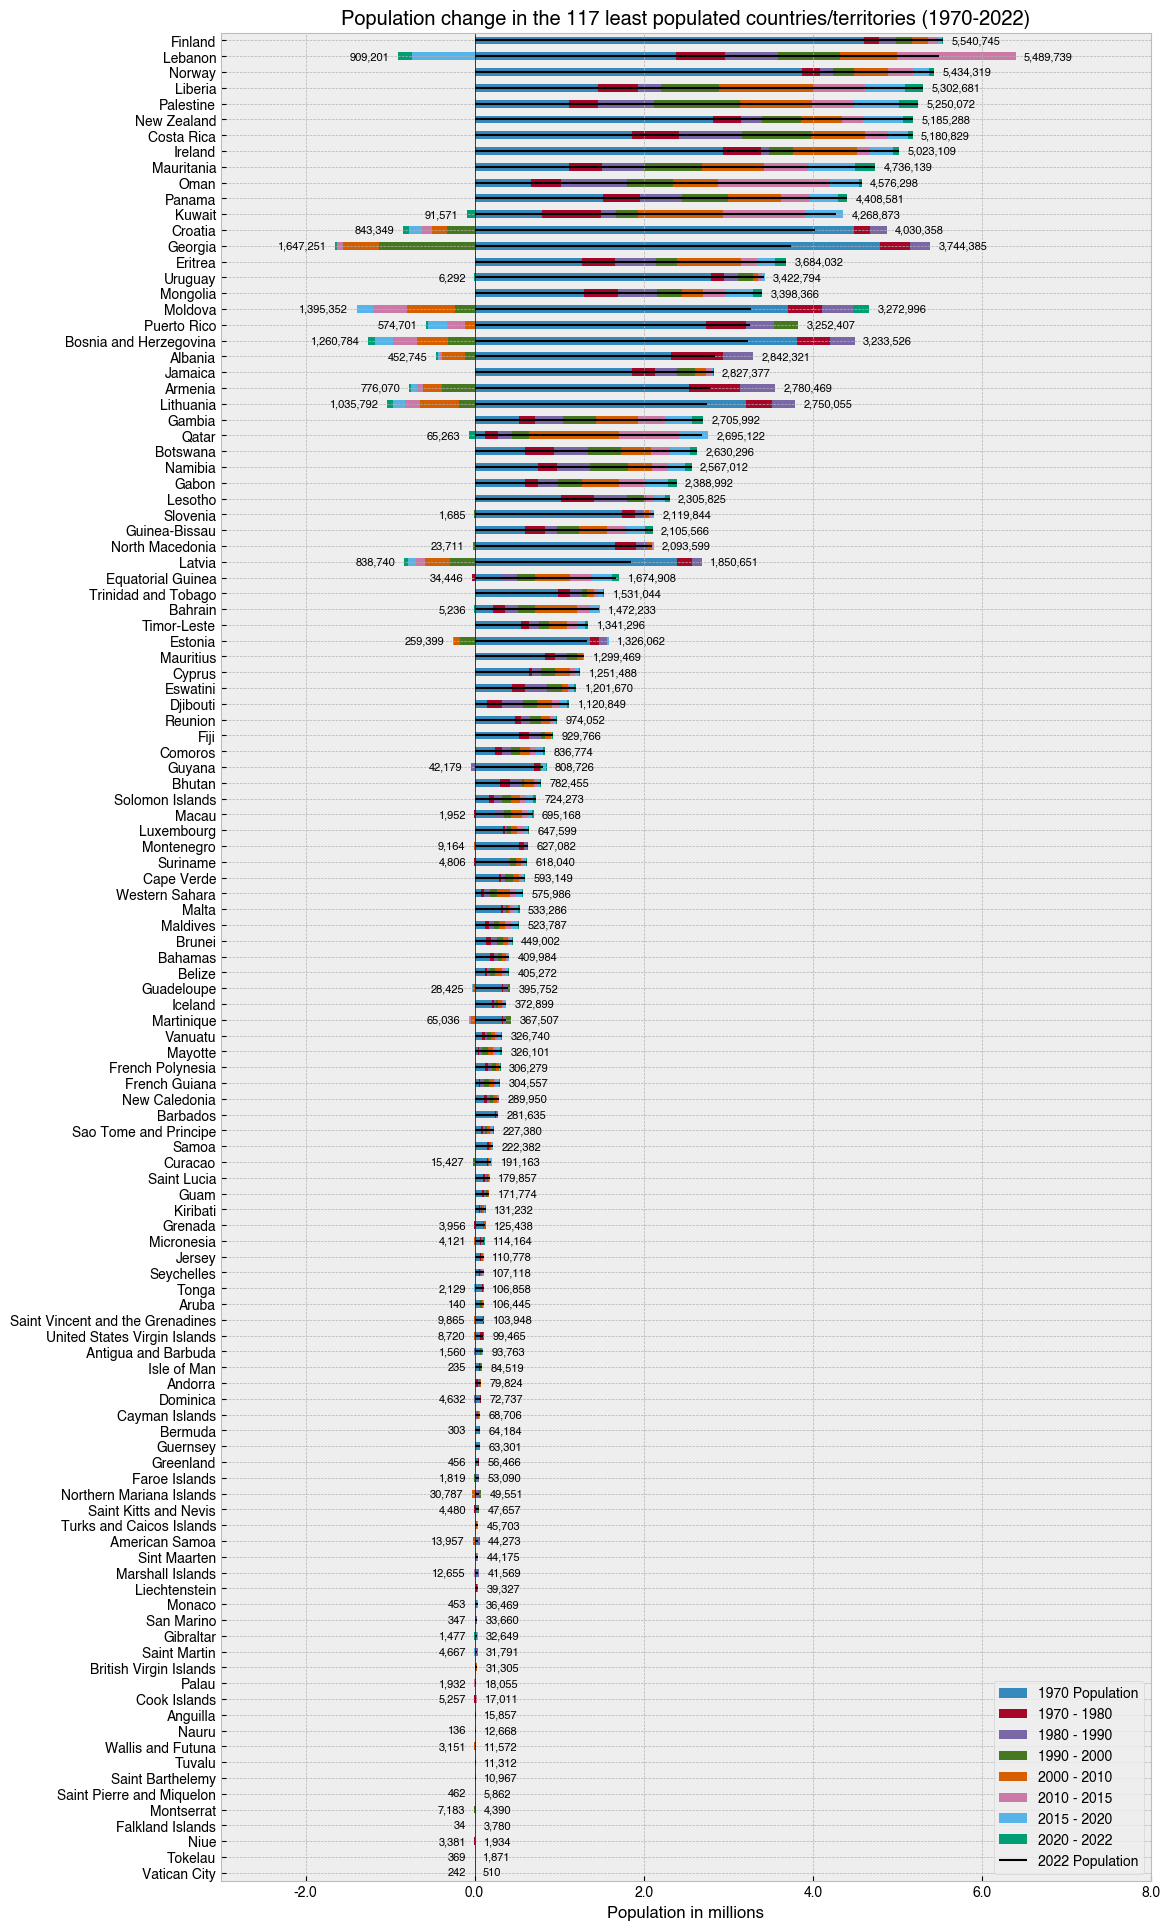

In [30]:
# Get the columns with the population data
pop_cols = df.columns[df.columns.str.endswith('Population')]

# Sort and select data
data = (df
 .set_index('Country')  # Set 'Country' as the index
 .sort_values('Rank', ascending=True)[pop_cols]  # Sort by 'Rank' and keep only the columns with population data
 .iloc[-117:]  # Choose the 117 LEAST populated countries with location-based indexing
 .loc[:, lambda df_: reversed(df_.columns)]  # Reverse the order of the columns in a fancy way
)

# Pull out the base population at 1970
base_pop_1970 = data['1970 Population']

# Calculate a column-wise differential. This means the data will
# now reflect change from the previous timepoint, rather than the
# total population at that time.
data = data.diff(axis=1)

# Put the base population back in
data['1970 Population'] = base_pop_1970

# Make a figure and axis that's big enough to show the data
fig, ax = plt.subplots(figsize=(12, 24))

# Plot a horizontal bar chart with pandas plotting method.
# Note the reversal of the data with [::-1], which is done
# to make sure the longest bars are at the top
data[::-1].plot(kind='barh', stacked=True, ax=ax)
lines = ax.hlines(range(0,117), 0, data[::-1].sum(axis=1).values, color='k', lw=1.5)

# Add the numbers as text
for i, (country, row) in enumerate(data[::-1].iterrows()):
    pop = row.sum()
    text_pos = row[row > 0].sum()
    ax.text(text_pos+1e5, i, '{:,}'.format(pop), va='center', fontsize=8)
    text_pos_neg = row[row < 0].abs().sum()
    if text_pos_neg > 0:
        ax.text(-(text_pos_neg+1e5), i, '{:,}'.format(text_pos_neg), va='center', ha='right', fontsize=8)

# Add a vertical line at zero as a visual aid
ax.axvline(0, 0, 1, c='k', lw=.5)

# Format the x axis
def millions_formatter(x, pos):
    return f'{x / 1_000_000}'
ax.xaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# Tweak axis 
ax.set(
    ylabel='',
    title='Population change in the 117 least populated countries/territories (1970-2022)',
    xlabel='Population in millions',
    xlim=(-3e6, 8e6)
)

# Put legend in lower right of figure
handles, labels = ax.get_legend_handles_labels()
handles.append(lines)
labels = [
    '1970 Population',
    '1970 - 1980',
    '1980 - 1990',
    '1990 - 2000',
    '2000 - 2010',
    '2010 - 2015',
    '2015 - 2020',
    '2020 - 2022',
    '2022 Population'
]
ax.legend(handles, labels, loc='lower right')


#fig.suptitle('Population change in the 117 least populated countries/territories (1970-2022)')

#ax.text(-5.5e5, 117, 'Decline | Growth')

# Save the figure with a tight bounding box and high resolution (300 dots-per-inch)
fig.savefig('../images/least_populated_countries_2022.png', bbox_inches='tight', dpi=300)

## The big picture - population density

After plotting the above, I realised I could do the same using only the `Density (per km²)` column. This was a little bit easier as it didn't require stacking the bars. 

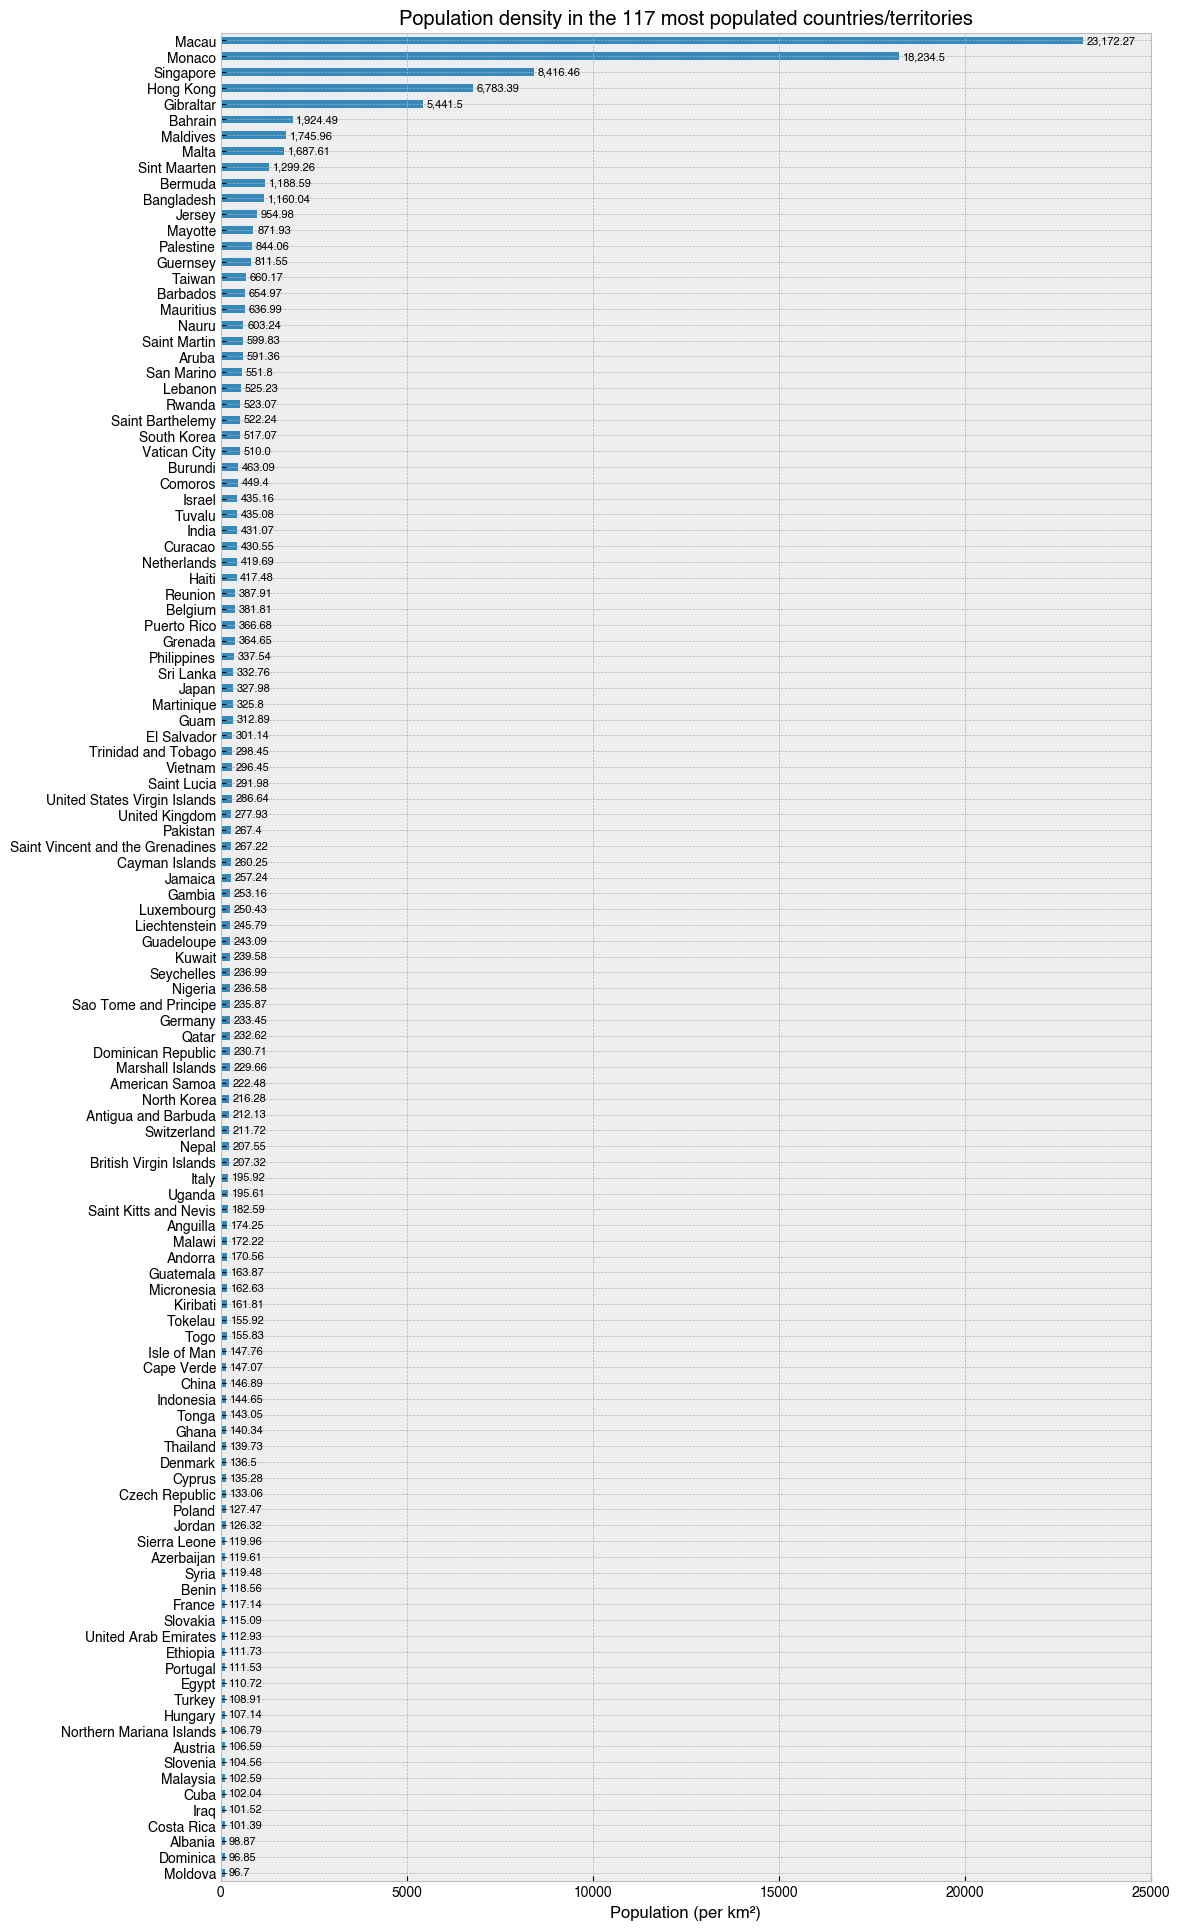

In [31]:
# Sort and select data
data = (df
 .set_index('Country')  # Set 'Country' as the index
 .sort_values('Density (per km²)', ascending=True)
 .iloc[-117:]  # Choose the 117 MOST densely populated countries with location-based indexing
)

# Make a figure and axis that's big enough to show the data
fig, ax = plt.subplots(figsize=(12, 24))

# Plot a horizontal bar chart with pandas plotting method.
data.plot(kind='barh', y='Density (per km²)', ax=ax, legend=False)

# Add the numbers in text
for i, (country, row) in enumerate(data.iterrows()):
    pop = row['Density (per km²)']
    ax.text(pop+100, i, '{:,}'.format(round(pop, 2)), va='center', fontsize=8)

# Add a vertical line at zero as a visual aid
ax.axvline(0, 0, 1, c='k', lw=.5)

# Tweak axis 
ax.set(
    ylabel='',
    title='Population density in the 117 most populated countries/territories',
    xlabel='Population (per km²)',
    xlim=(0, 25000)
)

# Save the figure with a tight bounding box and high resolution (300 dots-per-inch)
fig.savefig('../images/most_dense_countries_2022.png', bbox_inches='tight', dpi=300)

What's it like to be one of 23,172 people in a square kilometer of land? Go to Macau and you'll find out. Also, I didn't realise Gibralter was so dense.

Now for the other half...

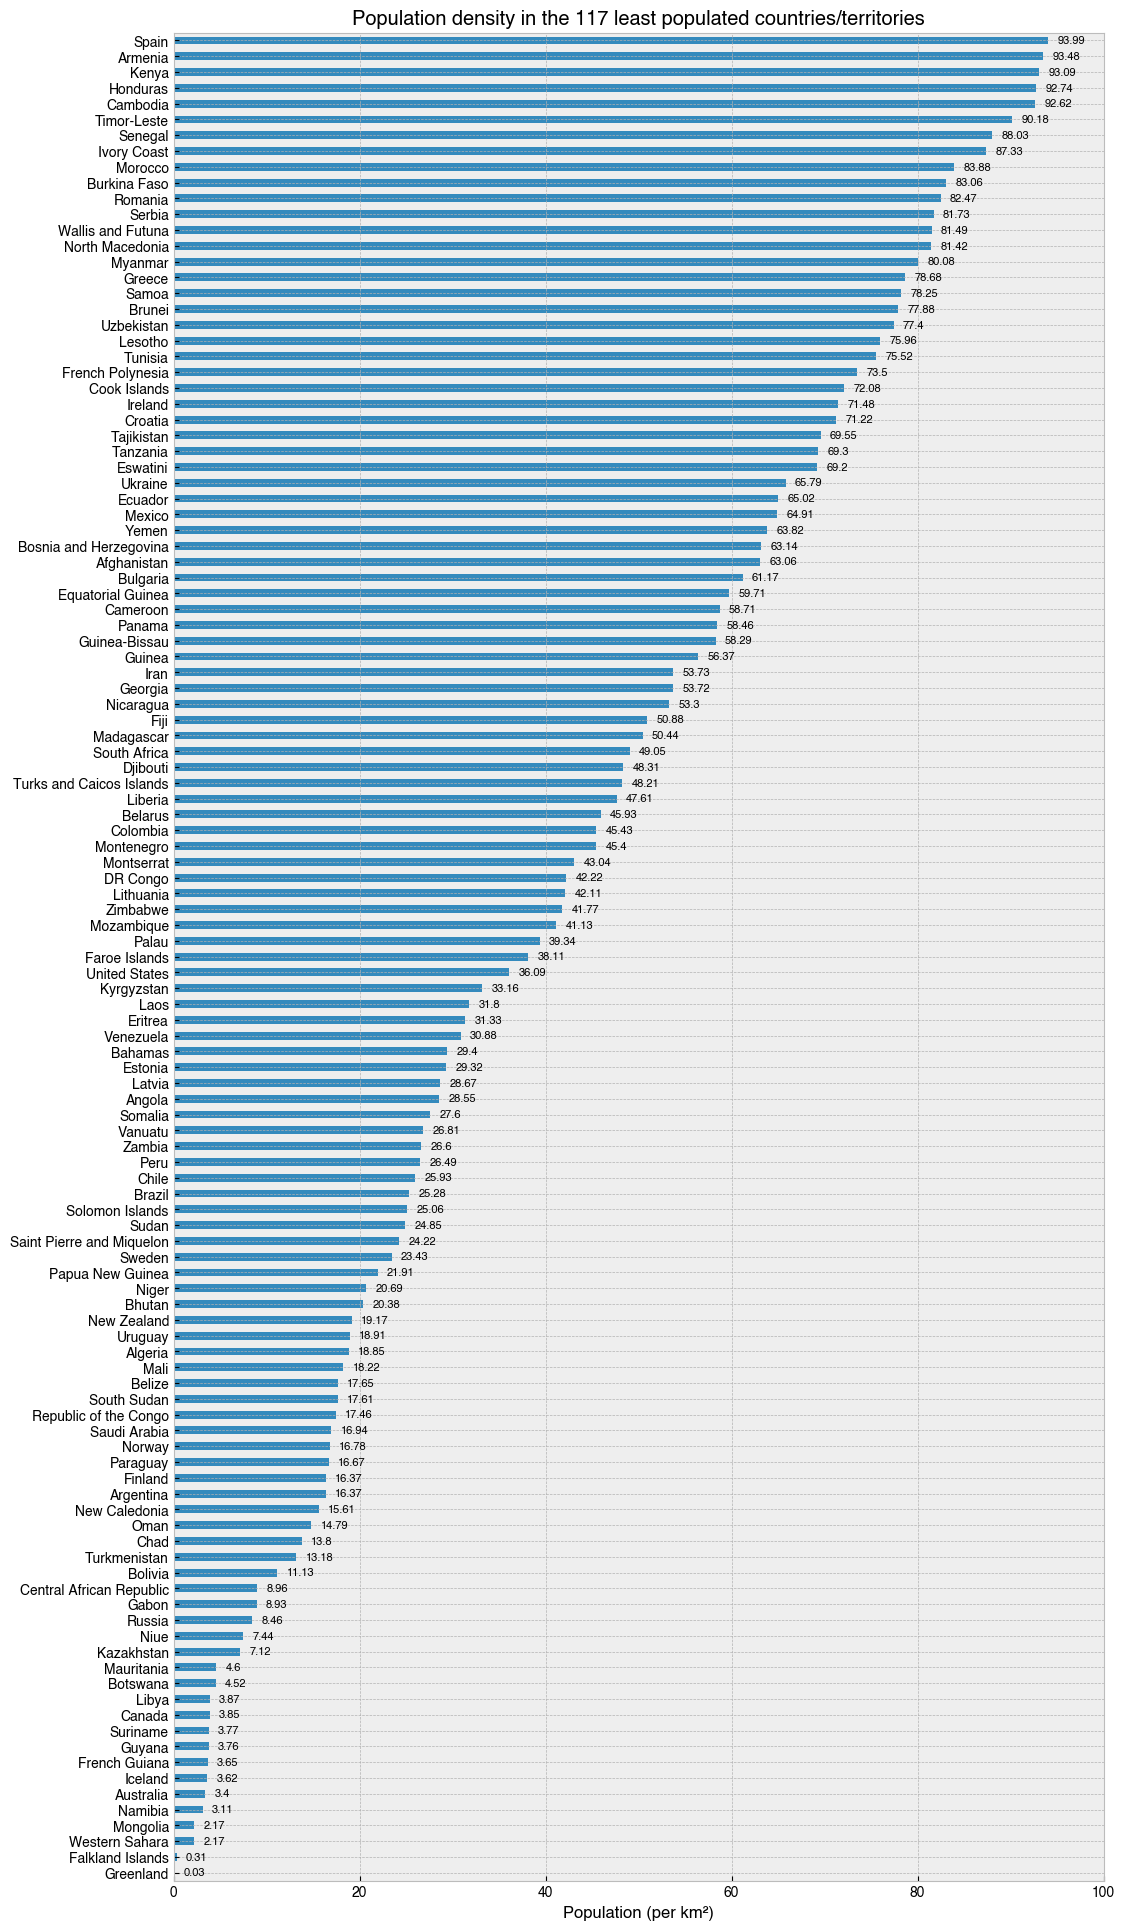

In [32]:
# Sort and select data
data = (df
 .set_index('Country')  # Set 'Country' as the index
 .sort_values('Density (per km²)', ascending=True)
 .iloc[0:117]  # Choose the 117 LEAST densely populated countries with location-based indexing
)

# Make a figure and axis that's big enough to show the data
fig, ax = plt.subplots(figsize=(12, 24))

# Plot a horizontal bar chart with pandas plotting method.
data.plot(kind='barh', y='Density (per km²)', ax=ax, legend=False)

# Add the numbers in text
for i, (country, row) in enumerate(data.iterrows()):
    pop = row['Density (per km²)']
    ax.text(pop+1, i, '{:,}'.format(round(pop, 2)), va='center', fontsize=8)

# Add a vertical line at zero as a visual aid
ax.axvline(0, 0, 1, c='k', lw=.5)

# Tweak axis 
ax.set(
    ylabel='',
    title='Population density in the 117 least populated countries/territories',
    xlabel='Population (per km²)',
    xlim=(0, 100)
)

# Save the figure with a tight bounding box and high resolution (300 dots-per-inch)
fig.savefig('../images/least_dense_countries_2022.png', bbox_inches='tight', dpi=300)

Iceland... A beautiful country, where a kilometer of land is shared by only 3.62 people. 


That's it for now. These examples are complicated, but if you study them carefully, change bits, and come up with your own variations, you will learn a lot about Python and `pandas` in the process! If you are feeling adventures, why not try and replicate these plots for the `Area (km²)` column? In this situation, countries like Russia and Canada would be right at the top, and at the bottom would be The Vatican City and small island nations like the Falkland and Faroe Islands. 